## Case Study: How does a bike-share navigate speedy success?

### Introduction
In this case study we will work for a fictional company, Cyclistic, and meet different characters and team members. In order to answer the key business questions, we will follow the steps learned in the Google data analytics course: ask, prepare, process, analyze, share and act.

The data has been made available by Motivate International Inc under this [license](https://ride.divvybikes.com/data-license-agreement)

A brief explanation of the APPASA:-

##### **Ask**
1. Ask effective questions
2. Define the scope of the analysis
3. Use structured thinking
4. Define what success look like

##### **Prepare**
1. Verify data's integrity, credibility and reliability
2. Identify and use different data formats, types and structures
3. Check data for bias
4. Organize and protect data

##### **Process**
1. Transform and clean the data
2. Verify and document the results

##### **Analyze**
1. Identify patterns and draw conclusion
2. Make predictions and recommendation
3. Make data driven decisions

##### **Share**
1. Create effective visualizations
2. Create story of data
3. Share insights to stakeholders

##### **Act**
1. Provide recommendations based on insights
2. Solve problems 
3. Create something new


### Scenario 
We will analyze the data and understand how casual riders and annual members use 
Cyclistic bike differently and from these insights we will design a new marketing strategy to convert casual riders into annual members.

### 1.Ask
We will be asking question with SMART (Specific, Measurable, Action-oriented, Relevant, Time-bound) methodology.

##### **Stakeholder's expectation**
* Design marketing strategies aimed at converting casual riders into annual members

##### **Deliverables**
* Insight on how annual members and casual riders use cyclistic bikes differently.
* Provide effective visuals and relevant data to support insights.
* Use insights to give three recommendations to convert casual riders to member riders.

##### **Questions to ask**
* What's the problem we are trying to solve? ->
We are trying to find how do annual members and casual riders use the bikes differently.
* Who are my Stakeholders? ->
Director of Marketting, Cyclistic executive team

### 2.Prepare

##### **About the data**
The data is available at this [link](https://divvy-tripdata.s3.amazonaws.com/index.html) and is made available by Motivate International Inc. There total 12 datasets from April, 2020 to March, 2021. Each dataset captures the details of every ride logged by the customers of Cyclistic.

##### **Tools to be used**
We will be using SQL and R to organize and identify biases in the data.

##### **Loading libraries**

In [1]:
library(tidyverse)
library(janitor)
library(dplyr)
library(tidyr)
library(lubridate)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




##### **Load datasets**

In [2]:

df_202004 <- read.csv("../input/cyclistic-bike-share/202004-divvy-tripdata.csv")
df_202005 <- read.csv("../input/cyclistic-bike-share/202005-divvy-tripdata.csv")
df_202006 <- read.csv("../input/cyclistic-bike-share/202006-divvy-tripdata.csv")
df_202007 <- read.csv("../input/cyclistic-bike-share/202007-divvy-tripdata.csv")
df_202008 <- read.csv("../input/cyclistic-bike-share/202008-divvy-tripdata.csv")
df_202009 <- read.csv("../input/cyclistic-bike-share/202009-divvy-tripdata.csv")
df_202010 <- read.csv("../input/cyclistic-bike-share/202010-divvy-tripdata.csv")
df_202011 <- read.csv("../input/cyclistic-bike-share/202011-divvy-tripdata.csv")
df_202012 <- read.csv("../input/cyclistic-bike-share/202012-divvy-tripdata.csv")
df_202101 <- read.csv("../input/cyclistic-bike-share/202101-divvy-tripdata.csv")
df_202102 <- read.csv("../input/cyclistic-bike-share/202102-divvy-tripdata.csv")
df_202103 <- read.csv("../input/cyclistic-bike-share/202103-divvy-tripdata.csv")

##### **Check the column names consistency for each dataframe**

In [3]:
colnames(df_202004)
colnames(df_202005)
colnames(df_202006)
colnames(df_202007)
colnames(df_202008)
colnames(df_202009)
colnames(df_202010)
colnames(df_202011)
colnames(df_202012)
colnames(df_202101)
colnames(df_202102)
colnames(df_202103)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

##### **Observation**
We found that all the column names is same for all the dataframes.

##### **Find out the structure of data to remove any irregualarity**

In [4]:
str(df_202004)
str(df_202005)
str(df_202006)
str(df_202007)
str(df_202008)
str(df_202009)
str(df_202010)
str(df_202011)
str(df_202012)
str(df_202101)
str(df_202102)
str(df_202103)

'data.frame':	84776 obs. of  13 variables:
 $ ride_id           : chr  "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr  "2020-04-26 17:45:14" "2020-04-17 17:08:54" "2020-04-01 17:54:13" "2020-04-07 12:50:19" ...
 $ ended_at          : chr  "2020-04-26 18:12:03" "2020-04-17 17:17:03" "2020-04-01 18:08:36" "2020-04-07 13:02:31" ...
 $ start_station_name: chr  "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ start_station_id  : int  86 503 142 216 125 173 35 434 627 377 ...
 $ end_station_name  : chr  "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : int  152 499 255 657 323 35 635 382 359 508 ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.7 -87.6 ..

**We can also use the glimpse() function to have a look at the data.**

In [5]:
glimpse(df_202004)
glimpse(df_202005)
glimpse(df_202006)
glimpse(df_202007)
glimpse(df_202008)
glimpse(df_202009)
glimpse(df_202010)
glimpse(df_202011)
glimpse(df_202012)
glimpse(df_202101)
glimpse(df_202102)
glimpse(df_202103)


Rows: 84,776
Columns: 13
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <chr> "2020-04-26 17:45:14", "2020-04-17 17:08:54", "2020…
$ ended_at           <chr> "2020-04-26 18:12:03", "2020-04-17 17:17:03", "2020…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <int> 86, 503, 142, 216, 125, 173, 35, 434, 627, 377, 508…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <int> 152, 499, 255, 657, 323, 35, 635, 382, 359, 508, 37…
$ start_lat          <dbl> 41.8964, 41.9244, 41.8945, 41.9030, 41.8902, 41.896…
$ start_lng          <dbl> -87.6610, -87.7154, -87.6179, -87.6975, -87.6262, -…
$ end_lat            <dbl> 41.9322, 41.9306, 41.8679, 41.8992, 41.9695, 41.892…
$ end_lng            <dbl> -87.6586, -87.7238, -87.6230, -87.6722, -87.6547, -…
$ member_casual

##### **Observation**
We observed that in dataframes df_202012, df_202101, df_202102 and df__202103 the start_station_id and end_station_id columns are of char datatype and due to that we can't merge the datasets and work on it. So, We need to convert the start_station_id and end_station_id columns of other dataframes to char to maintain the consistency across all the dataframes.

##### **Transformation of data**

In [6]:
df_202004 <- df_202004 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
df_202005 <- df_202005 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
df_202006 <- df_202006 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
df_202007 <- df_202007 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
df_202008 <- df_202008 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
df_202009 <- df_202009 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
df_202010 <- df_202010 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
df_202011 <- df_202011 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))

### 3. Process

Now we will combine all the data to a single data frame

In [7]:
bike_shares <- bind_rows(df_202004,df_202005,df_202006,df_202007,df_202008,df_202009,df_202010,df_202011,df_202012,df_202101,df_202102,df_202103)

**Let's take a glimpse of the new data frame we created.**

In [8]:
glimpse(bike_shares)

Rows: 3,489,748
Columns: 13
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <chr> "2020-04-26 17:45:14", "2020-04-17 17:08:54", "2020…
$ ended_at           <chr> "2020-04-26 18:12:03", "2020-04-17 17:17:03", "2020…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <chr> "86", "503", "142", "216", "125", "173", "35", "434…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <chr> "152", "499", "255", "657", "323", "35", "635", "38…
$ start_lat          <dbl> 41.8964, 41.9244, 41.8945, 41.9030, 41.8902, 41.896…
$ start_lng          <dbl> -87.6610, -87.7154, -87.6179, -87.6975, -87.6262, -…
$ end_lat            <dbl> 41.9322, 41.9306, 41.8679, 41.8992, 41.9695, 41.892…
$ end_lng            <dbl> -87.6586, -87.7238, -87.6230, -87.6722, -87.6547, -…
$ member_cas

##### **Observation**
Here we observed that the 'started_at' and 'ended_at' column contains date and time but the column type is 'chr' so, first we need to modify these columns as date type.

In [9]:
bike_shares <- bike_shares %>%
  mutate(started_at = ymd_hms(started_at), ended_at = ymd_hms(ended_at))


glimpse(bike_shares)

Rows: 3,489,748
Columns: 13
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <dttm> 2020-04-26 17:45:14, 2020-04-17 17:08:54, 2020-04-…
$ ended_at           <dttm> 2020-04-26 18:12:03, 2020-04-17 17:17:03, 2020-04-…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <chr> "86", "503", "142", "216", "125", "173", "35", "434…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <chr> "152", "499", "255", "657", "323", "35", "635", "38…
$ start_lat          <dbl> 41.8964, 41.9244, 41.8945, 41.9030, 41.8902, 41.896…
$ start_lng          <dbl> -87.6610, -87.7154, -87.6179, -87.6975, -87.6262, -…
$ end_lat            <dbl> 41.9322, 41.9306, 41.8679, 41.8992, 41.9695, 41.892…
$ end_lng            <dbl> -87.6586, -87.7238, -87.6230, -87.6722, -87.6547, -…
$ member_cas

##### **Observation**
We can see now that the data type has changed to dttm which is what we were looking for.
Now lets modify some column names to make it more understandable and accurate to the data in them and combine the start_lat with start_lang and end_lat with end_lng.

In [10]:
bike_shares<- bike_shares %>%
  rename(ride_type = rideable_type,
         start_date_time = started_at,
         end_date_time = ended_at,
         membership_type = member_casual) %>%
  unite(start_lat_lng,c("start_lat","start_lng"),sep = " ") %>%
  unite(end_lat_lng,c("end_lat","end_lng"),sep = " ")

glimpse(bike_shares)


Rows: 3,489,748
Columns: 11
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ ride_type          <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ start_date_time    <dttm> 2020-04-26 17:45:14, 2020-04-17 17:08:54, 2020-04-…
$ end_date_time      <dttm> 2020-04-26 18:12:03, 2020-04-17 17:17:03, 2020-04-…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <chr> "86", "503", "142", "216", "125", "173", "35", "434…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <chr> "152", "499", "255", "657", "323", "35", "635", "38…
$ start_lat_lng      <chr> "41.8964 -87.661", "41.9244 -87.7154", "41.8945 -87…
$ end_lat_lng        <chr> "41.9322 -87.6586", "41.9306 -87.7238", "41.8679 -8…
$ membership_type    <chr> "member", "member", "member", "member", "casual", "…


We will prepare some new columns like the date of trip, month of trip and the duration of the trip to make the data set easier for further analyzation.


In [11]:
# creating a new column with the trip start day of the week

bike_shares <- bike_shares %>% 
  mutate(week_day = wday(start_date_time,label=TRUE,abbr=FALSE))

# creating a new column for the month the trip started

bike_shares <- bike_shares %>%
  mutate(month = month(start_date_time, label = TRUE, abbr = FALSE))


# creating a new column for the trip start time

bike_shares <- bike_shares %>%
  mutate(start_time = format(start_date_time,"%H:%M:%S"))%>%
  mutate(start_time = hms(start_time))

# creating a new column for the trip start hour
bike_shares <- bike_shares %>%
  mutate(start_hour = hour(start_time))


# calculate the duration of the trip

bike_shares <- bike_shares %>%
  mutate(duration = as.double(difftime(end_date_time,start_date_time,units = "mins")))


glimpse(bike_shares)


Rows: 3,489,748
Columns: 16
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ ride_type          <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ start_date_time    <dttm> 2020-04-26 17:45:14, 2020-04-17 17:08:54, 2020-04-…
$ end_date_time      <dttm> 2020-04-26 18:12:03, 2020-04-17 17:17:03, 2020-04-…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <chr> "86", "503", "142", "216", "125", "173", "35", "434…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <chr> "152", "499", "255", "657", "323", "35", "635", "38…
$ start_lat_lng      <chr> "41.8964 -87.661", "41.9244 -87.7154", "41.8945 -87…
$ end_lat_lng        <chr> "41.9322 -87.6586", "41.9306 -87.7238", "41.8679 -8…
$ membership_type    <chr> "member", "member", "member", "member", "casual", "…
$ week_day           <ord> Sunday, Friday, Wednesday, Tuesday, Saturday, Thurs…
$ month     

Now let's check if there are any values in the duration column with negative values

In [12]:
nrow(subset(bike_shares, duration<0 ))

[1] 10552

We need to remove these rows as this row may contain incorrect data and these cases consist of only 0.3% of data which is a very  small number so these won't affect our outcome.

In [13]:
#drop the negative duration fields and store it in a new dataframe
bike_shares_v2 <- bike_shares[!(bike_shares$duration<0),]

glimpse(bike_shares_v2)

Rows: 3,479,196
Columns: 16
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ ride_type          <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ start_date_time    <dttm> 2020-04-26 17:45:14, 2020-04-17 17:08:54, 2020-04-…
$ end_date_time      <dttm> 2020-04-26 18:12:03, 2020-04-17 17:17:03, 2020-04-…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <chr> "86", "503", "142", "216", "125", "173", "35", "434…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <chr> "152", "499", "255", "657", "323", "35", "635", "38…
$ start_lat_lng      <chr> "41.8964 -87.661", "41.9244 -87.7154", "41.8945 -87…
$ end_lat_lng        <chr> "41.9322 -87.6586", "41.9306 -87.7238", "41.8679 -8…
$ membership_type    <chr> "member", "member", "member", "member", "casual", "…
$ week_day           <ord> Sunday, Friday, Wednesday, Tuesday, Saturday, Thurs…
$ month     

Now let's make sure the membership_type column has only two distinct values and also we would observe the trip duration by different type of members


In [14]:
# checking the distinct value in membership type column and the count
table(bike_shares_v2$membership_type)

# trip duration by different type of members
setNames(aggregate(duration ~ membership_type, bike_shares_v2, sum), c("customer_type", "total_duration_of_trip(mins)"))


 casual  member 
1427121 2052075 

customer_type,total_duration_of_trip(mins)
<chr>,<dbl>
casual,64176970
member,33069418


### 4. Analyze and Share
Now that our data is ready for further analysis we will discover some interesting insights of the data.

At first we will try to get some overview of the trip duration 

In [15]:
summary(bike_shares_v2$duration)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     7.93    14.57    27.95    26.68 58720.03 

##### **Observation**
This doesn't describe much about the data so now lets try to put it against the membership type to gain more insight


In [16]:
bike_shares_v2 %>%
  group_by(membership_type) %>%
  summarise(min_trip_duration = min(duration),
            max_trip_duration = max(duration),
            avg_trip_duration = mean(duration))

membership_type,min_trip_duration,max_trip_duration,avg_trip_duration
<chr>,<dbl>,<dbl>,<dbl>
casual,0,55683.88,44.96954
member,0,58720.03,16.11511


##### **Observation**
We observe that the average trip duration of casual members is double than that of those who have the membership. Now, let's analyze further and check if the trip duration by each day of the week to find some more insights.

In [17]:
bike_shares_v2 %>%
  group_by(membership_type,week_day) %>%
  summarise(num_of_rides = n(), avg_duration = mean(duration))

`summarise()` has grouped output by 'membership_type'. You can override using the `.groups` argument.



membership_type,week_day,num_of_rides,avg_duration
<chr>,<ord>,<int>,<dbl>
casual,Sunday,262271,50.74309
casual,Monday,151169,44.97605
casual,Tuesday,145267,40.48734
casual,Wednesday,158402,40.31401
casual,Thursday,166402,42.96878
casual,Friday,208551,42.76717
casual,Saturday,335059,46.95597
member,Sunday,265299,18.21758
member,Monday,267336,15.33711


##### **Observation**
The average duration of casual customers are more than that of the member type on almost all weekdays but the number of rides on some days are greater for the member type than that of casual type customers, but it's hard to get an overview in this format so lets plot a graph to view the difference.


`summarise()` has grouped output by 'membership_type'. You can override using the `.groups` argument.



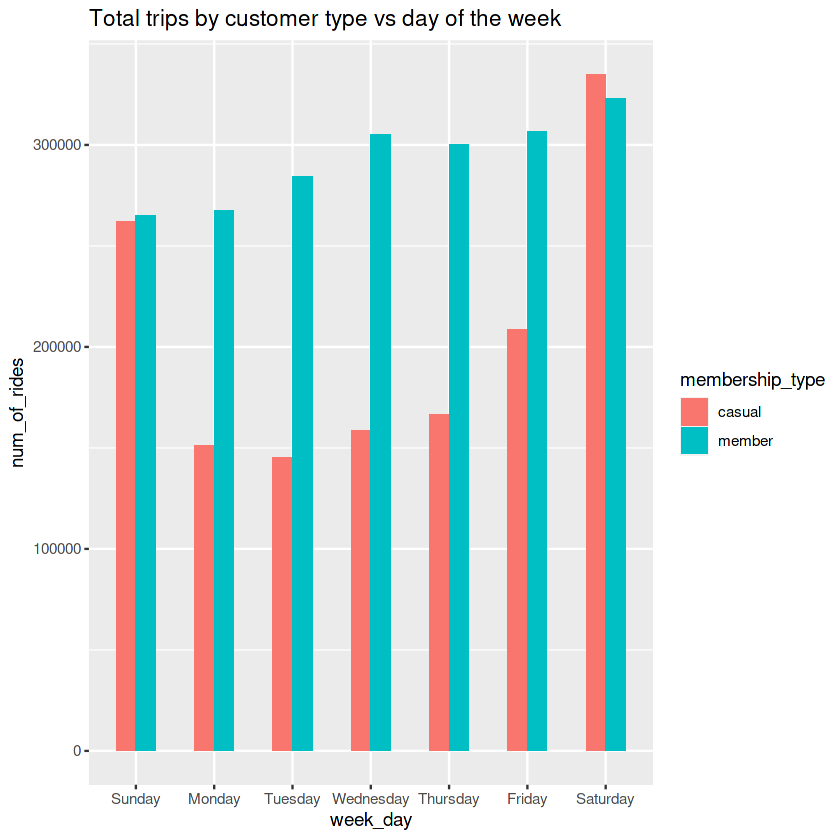

In [18]:
bike_shares_v2 %>%
  group_by(membership_type, week_day) %>%
  summarise(num_of_rides = n()) %>%
  ggplot(aes(x= week_day, y = num_of_rides,fill = membership_type))+
  geom_col(width = 0.5, position = position_dodge(width = 0.5))+scale_y_continuous(labels = function(x) format(x, scientific = FALSE))+
  labs(title= "Total trips by customer type vs day of the week")

##### **Observation**
From the above graph we can see that the casual customers uses the bike more in the weekends and the bike rides number drops significantly during the weekdays but for the customer type member, the bike rides are almost significant throughout the week.

Now as we saw before that the average duration of trips by casual customers are much higher compared to those who have membership, so let's create a visualization to observe the trip duration by customers on each day of week.

`summarise()` has grouped output by 'membership_type'. You can override using the `.groups` argument.



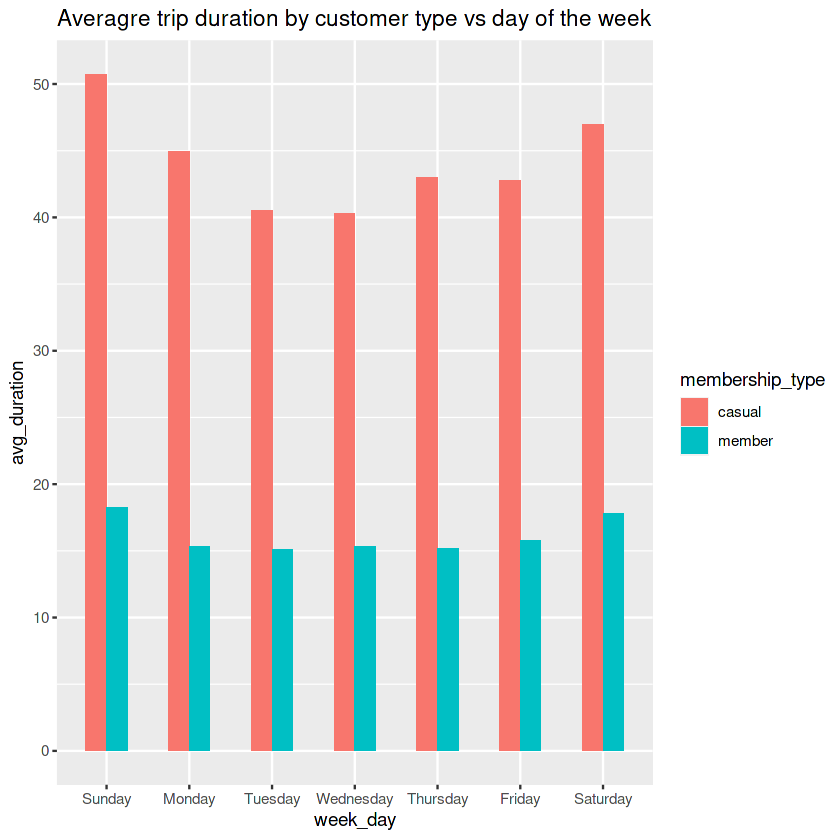

In [19]:
bike_shares_v2 %>%
  group_by(membership_type, week_day) %>%
  summarise(avg_duration =  mean(duration)) %>%
  ggplot(aes(x=week_day, y= avg_duration, fill= membership_type)) + 
  geom_col(width = 0.5, position = position_dodge(width = 0.5))+
  labs(title= "Averagre trip duration by customer type vs day of the week")

##### **Observation**
Here we observe that the casual members take almost twice as longer rides than the customer who have membership. Also the duration of trip is more in the weekends but doesn't drop much on the weekdays.

Now let's see how the number of bike rides differs by month for the casual and member customers.

`summarise()` has grouped output by 'membership_type'. You can override using the `.groups` argument.



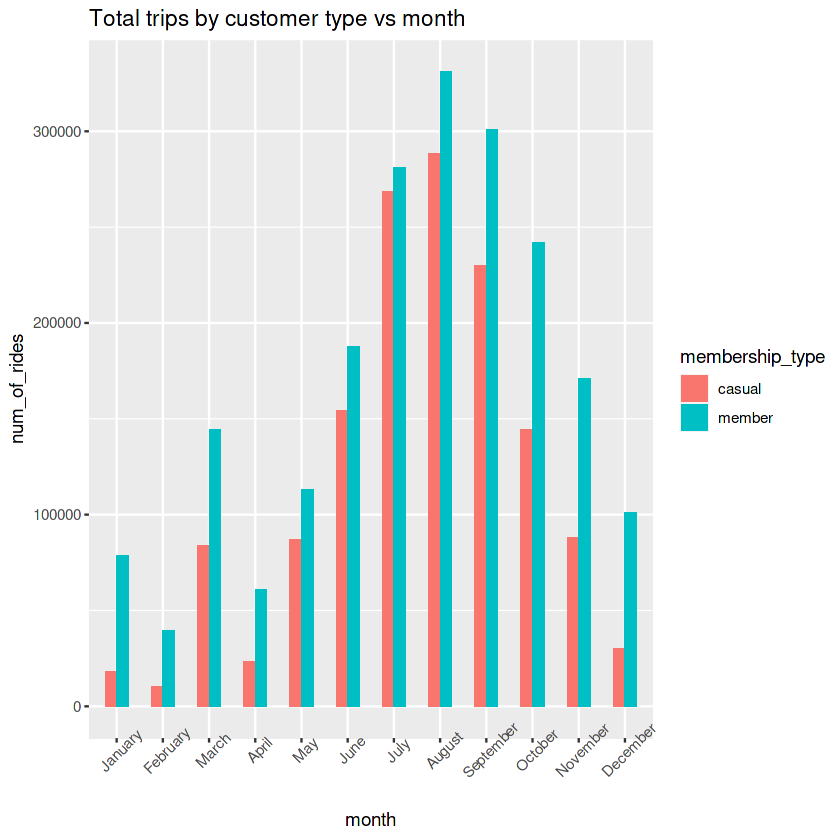

In [20]:
bike_shares_v2 %>%
  group_by(membership_type, month) %>%
  summarise(num_of_rides = n()) %>%
  ggplot(aes(x= month, y = num_of_rides, fill = membership_type)) +
  geom_col(width = 0.5, position = position_dodge(width = 0.5))+
  scale_y_continuous(labels = function(x) format(x,scientific =FALSE))+
  theme(axis.text.x = element_text(angle=45))+
  labs(title= "Total trips by customer type vs month")

##### **Observation**
We can see here that the number of rides taken is much higher in the month of july, august and september for both type of memebers which could be due to some external factors like climate or may be due the data was taken during ongoing covid situtaions.

Now let's create a plot on the average duration of rides by membership type with respect to the months

`summarise()` has grouped output by 'membership_type'. You can override using the `.groups` argument.



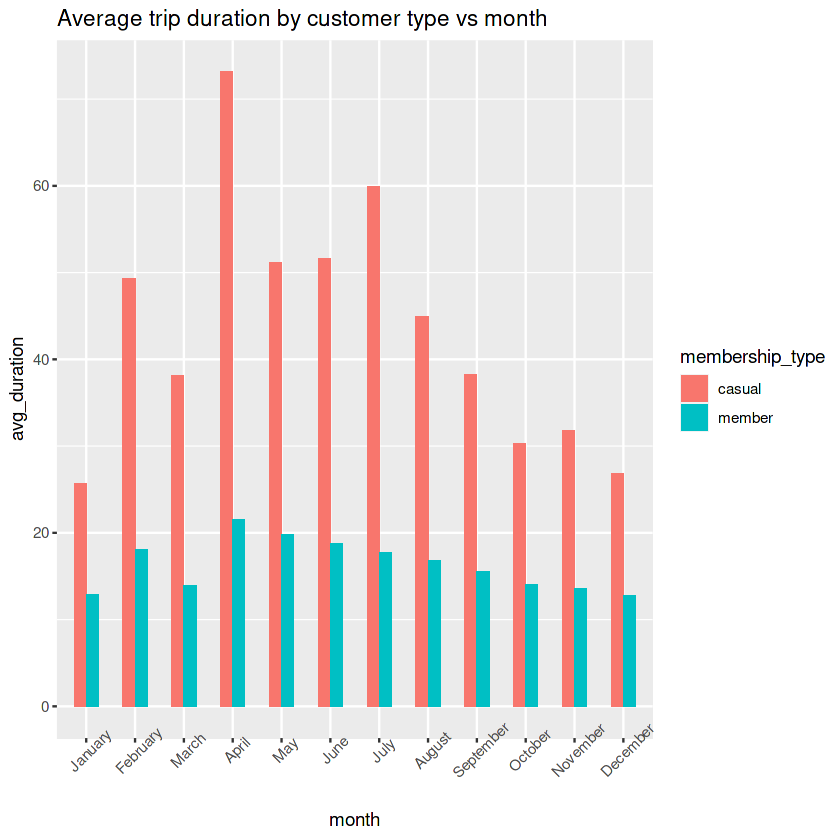

In [21]:
bike_shares_v2 %>%
  group_by(membership_type, month) %>%
  summarise(avg_duration = mean(duration)) %>%
  ggplot(aes(x = month, y= avg_duration, fill = membership_type))+
  geom_col(width=0.5, position = position_dodge(width = 0.5)) +
  theme(axis.text.x = element_text(angle=45))+
  labs(title= "Average trip duration by customer type vs month")

##### **Observation**
Here we can see that the average duration is highest in the month of April and very low in the months of october, november, december and january. Also this could  be sue to some external factors like climate and covid restrictions.

Now let's analyze how much of the bikes are used during a day by plotting a chart.

`summarise()` has grouped output by 'start_hour'. You can override using the `.groups` argument.



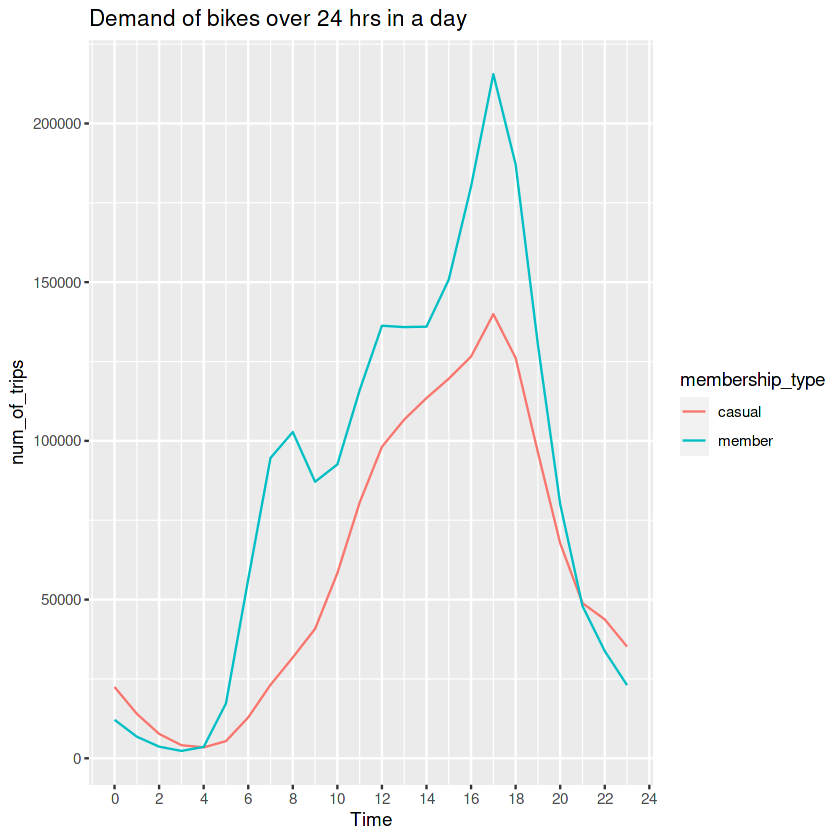

In [22]:
bike_shares_v2%>%
  group_by(start_hour, membership_type)%>%
  summarise(num_of_trips = n()) %>%
  ggplot(aes(x=start_hour, y= num_of_trips, group = membership_type, color = membership_type))+
  geom_line() + scale_x_continuous(breaks = c(0,2,4,6,8,10,12,14,16,18,20,22,24)) + labs(title = "Demand of bikes over 24 hrs in a day", x = "Time")

##### **Observation**
Here we observed that the peak hour for both kind of members to opt for bike service is around 5pm and we can also observe that during 7am to 9am there is a huge difference between the casual customers and the members, the members tends to use the bikes more during that time as compared to casual customers. Generally the office in and out time are around 7am-9am and 5pm-6pm respectively so may be the members uses the bike services for reaching their work locations.

Now, we can also check what kind of bike is used by both kind of members by plotting a chart.

`summarise()` has grouped output by 'membership_type'. You can override using the `.groups` argument.



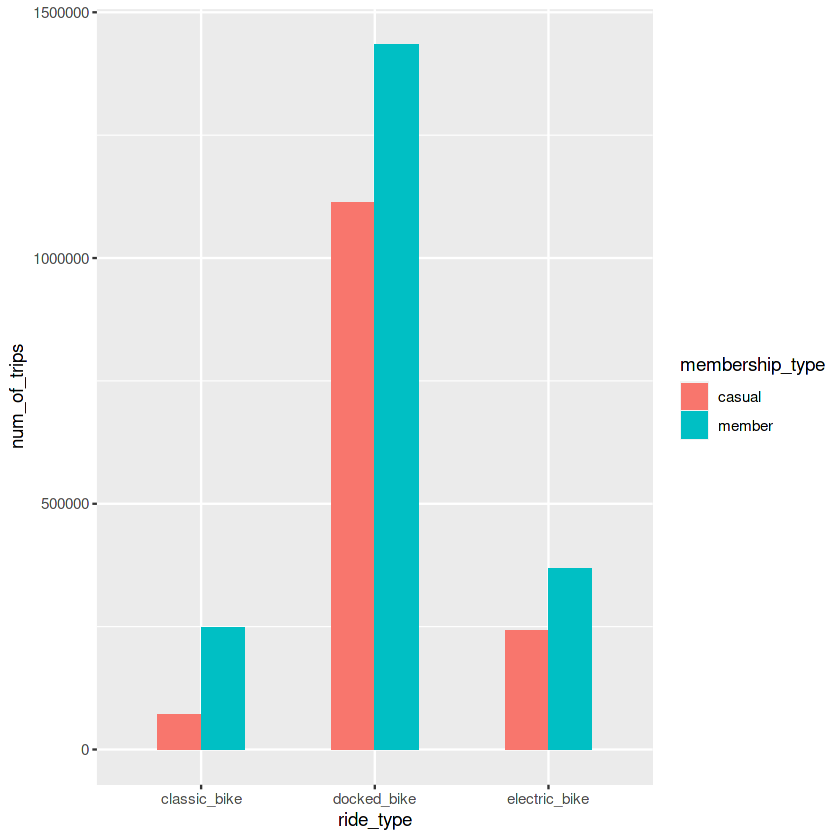

In [23]:
bike_shares_v2 %>%
  group_by(membership_type, ride_type) %>%
  summarize(num_of_trips = n()) %>%
  ggplot(aes(x= ride_type,y= num_of_trips, fill = membership_type, group = membership_type))+
  geom_col(width = 0.5, position = position_dodge(width = 0.5))

##### **Observation**
Here we can see that the docked bike is used most by both kind of members but we can't conclude anything from this graph as the prices or other details are not provided in the dataset.

Now we can also further analyse the data with the help of SQL or Tableau, we just need to export the data from the dataframe to a csv file.

### **6. Act**
We will now draw conclusion of our analysis and share some recommendation and insights on how the we can transform our casual customers to membership holders in Cyclistic bike share company. 

##### **Conclusion**
* There are about 1427121 casual customers which consist of about 41% of the total customers in the time period of Apr 2020 to March 2021.
* The average ride duration of casual customers is around 66% of the total duration of ride taken by all the customers from April 2020 to March 2021.
* The casual members took the bike rides more during the weekends, around 42% of rides taken by casual customers are during weekends whereas the bike rides for the membership customers are evenly spread throughout the week and only 28% took rides during weekends.
* The casual customers mostly took bike rides during 4pm-7pm in a day while the membership holders took most rides during 7am-9am as well as 4pm-7pm

##### **Recommendations**
* Special membership discounts or offers should be given to the customers who take bike rides during weekdays to covert the casual customers to members .
* Membership charges should have reduced pricing if more rides of long duration are taken during weekdays.
* Some gifts or prizes should be announced for the customers who took rides during evening time and would be having a membership.
* Special discounts should be placed if rides are taken during weekdays and during 9am-3pm to increase the riders during this time.
* There's a massive rise in the number of bike rides during july, august and september, so special short term three months membership plan would increase the number of customers with membership.
